In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import time
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
#import data and get a brief overview of first 5 rows
data = pd.read_csv("C:\\Users\\Mayowa\\Downloads\loan_data_set.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# DataFrame analysis 

In [3]:
data.describe(include='all')
#we add this parameter to include the categorical variables aswell
#immediatley see there are 422 Y and 192 N

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002699,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
pd.crosstab(data['Married'], data['Loan_Status'], margins=True)
#out of those who are married, 72% recieve a loan
#out of those who are not married, 63% recieve a loan

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


In [6]:
pd.crosstab(data['Education'], data['Loan_Status'], margins=True )
#out of the graduates, 71% recieve a loan
#out of the non graduates, 61% recieve a loan

Loan_Status,N,Y,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


In [7]:
pd.crosstab(data['Self_Employed'], data['Loan_Status'], margins=True )
# out of the self emlpoyed, 68% recieved a loan
# out of the not self employed, 69% recieved a loan

Loan_Status,N,Y,All
Self_Employed,,,
No,157,343,500
Yes,26,56,82
All,183,399,582


In [8]:
pd.crosstab(data['Credit_History'], data['Loan_Status'], margins=True )
#out of those who meet the credit guidelines, 80% recieved a loan
#out of those who dont meet the credit guidelines, 8% recieved a loan

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [9]:
# identify the number of missing values
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

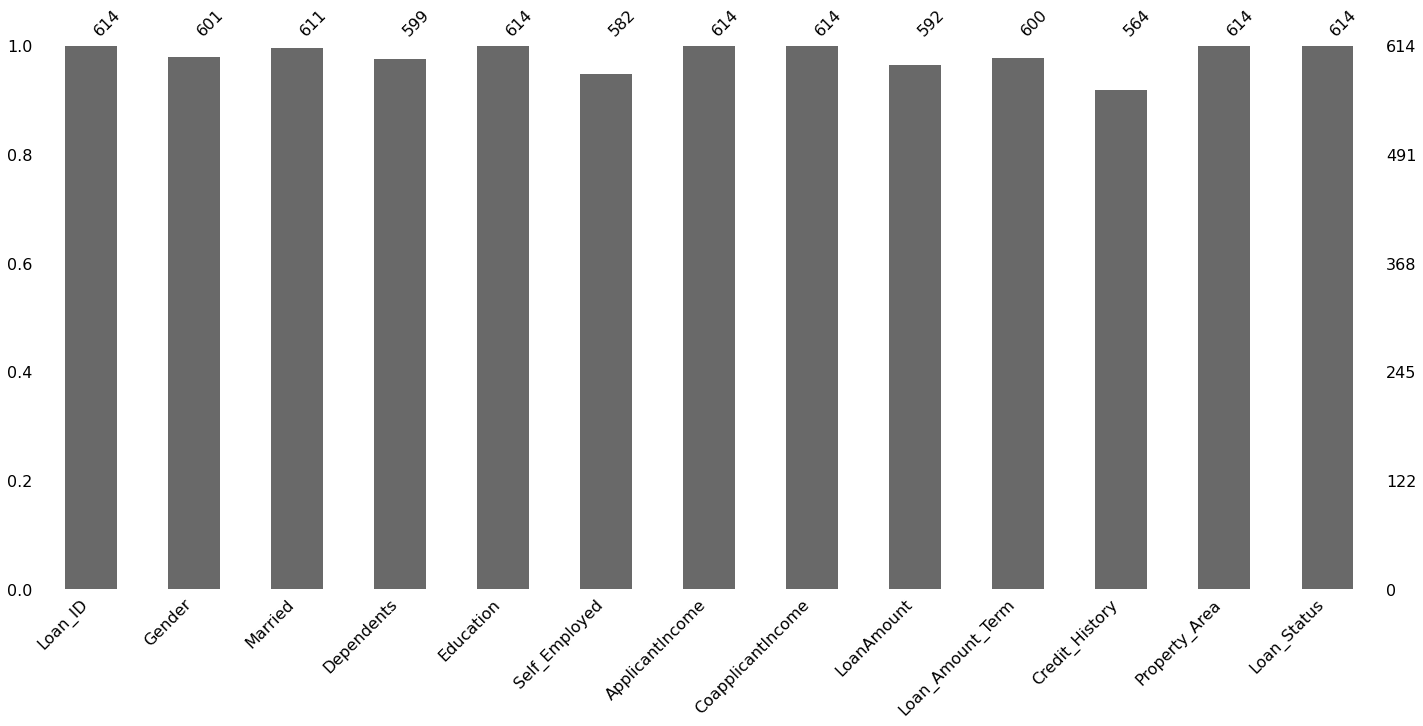

In [10]:
# bar chart showing missing values
msno.bar(data)

<AxesSubplot:>

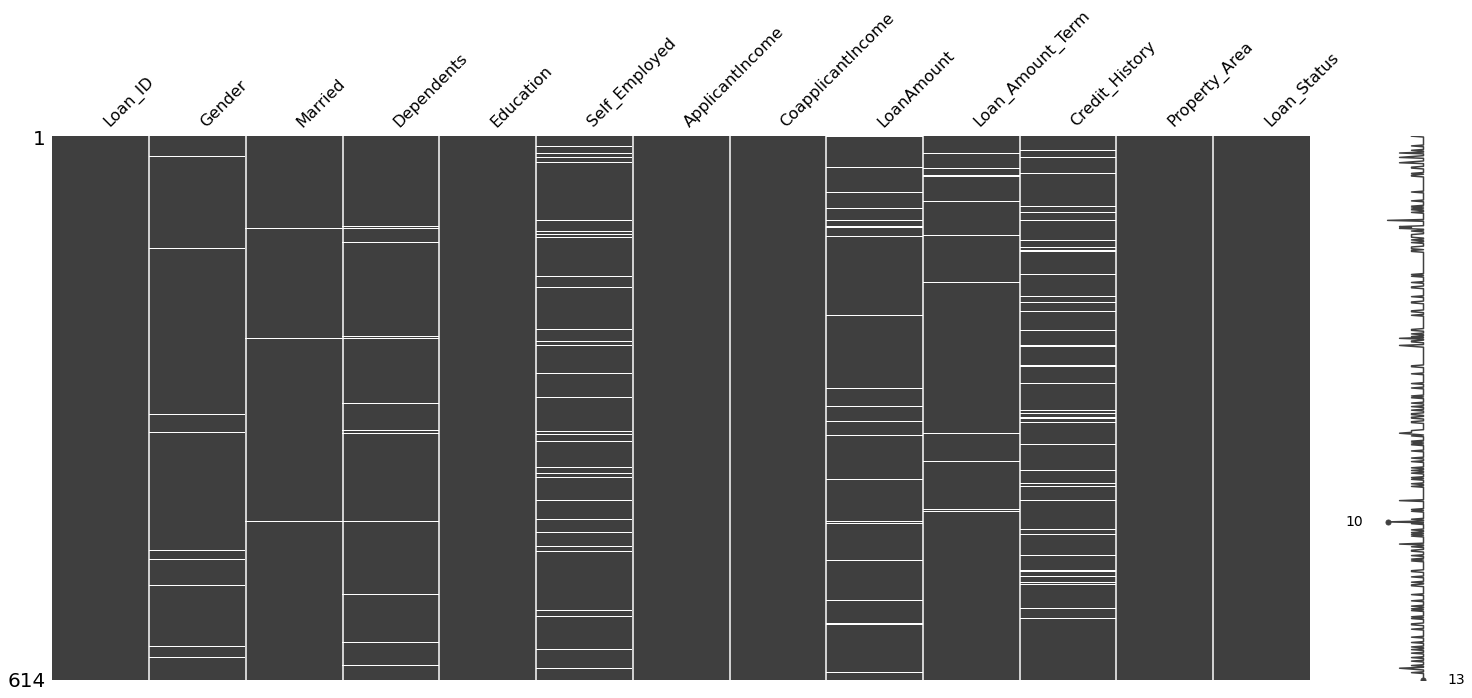

In [11]:
#matrix showing distribution of missing values
msno.matrix(data)

<AxesSubplot:>

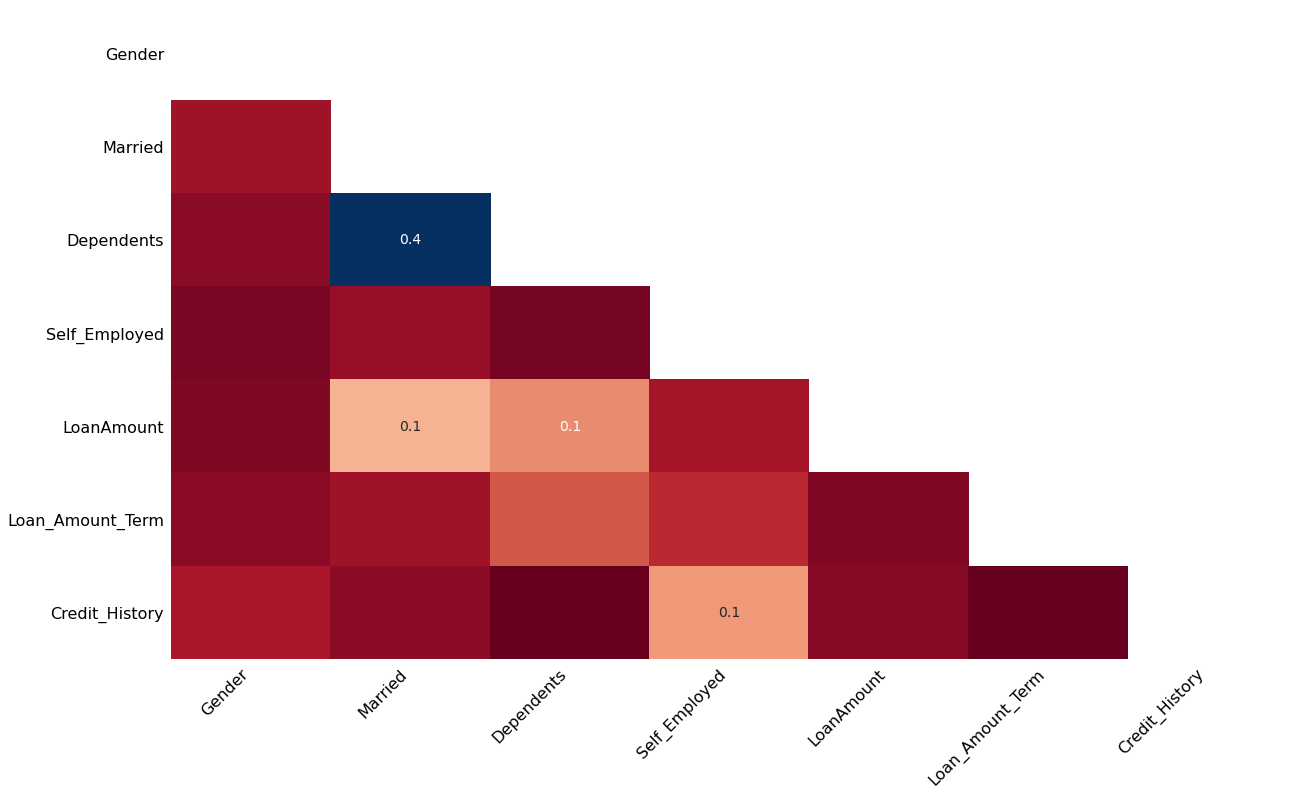

In [12]:
msno.heatmap(data)

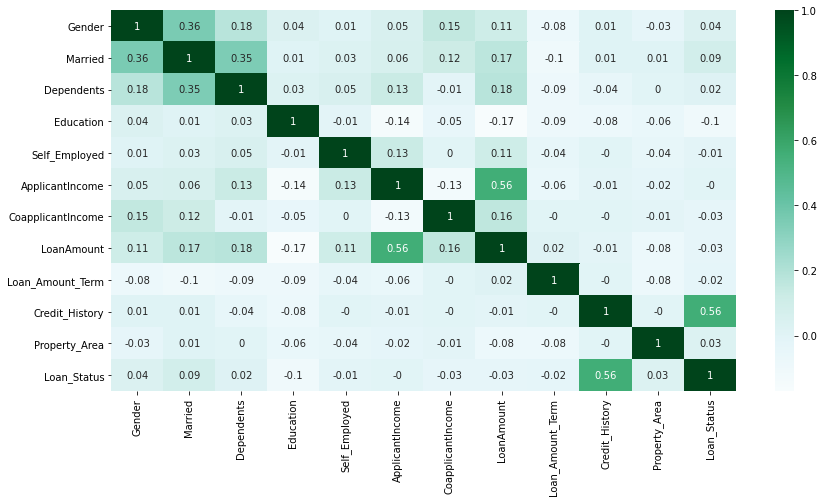

In [27]:
fig,ax=plt.subplots(figsize=(14, 7))
sns.heatmap(data=data.corr().round(2),annot=True,cmap="BuGn")
plt.show()

#  Pre-processing 

In [14]:
####missing data

In [15]:
data.drop("Loan_ID",axis=1,inplace=True)

In [16]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [17]:
data.dropna(inplace=True)
#because theres no correlation between missing values, use listwise deletion/complete case aanalysis to delete missing values
# after deleting, the proportion of loan status approvals are still the same #izzDsame

In [18]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
###### label encoder

In [20]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [21]:
le=LabelEncoder()
for col in data.columns.values:
    if data[col].dtypes=='object':
        data[col]=le.fit_transform(data[col])

In [22]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             564 non-null    int32  
 1   Married            564 non-null    int32  
 2   Dependents         564 non-null    int32  
 3   Education          564 non-null    int32  
 4   Self_Employed      564 non-null    int32  
 5   ApplicantIncome    564 non-null    int64  
 6   CoapplicantIncome  564 non-null    float64
 7   LoanAmount         564 non-null    float64
 8   Loan_Amount_Term   564 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      564 non-null    int32  
 11  Loan_Status        564 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 41.9 KB


In [24]:
data.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,0.820922,0.647163,0.751773,0.214539,0.132979,5466.436170,1530.448440,145.137687,342.595745,0.842199,1.030142,0.682624
std,0.383758,0.478277,1.017824,0.410867,0.339853,6271.344106,2471.721359,81.741320,63.838715,0.364878,0.784494,0.465868
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2892.750000,0.000000,101.750000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3815.000000,1105.500000,128.500000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5803.750000,2250.000000,162.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [25]:
data.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [26]:
data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [28]:
## creation of 'HouseholdIncome'

In [29]:
data['ApplicantIncome'].corr(data['LoanAmount'])

0.5648355224108583

In [30]:
data['HouseholdIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [31]:
data['HouseholdIncome'].corr(data['LoanAmount'])

0.6101880697583686

In [32]:
data['CoapplicantIncome'].value_counts()

0.0       254
2500.0      5
1666.0      5
2083.0      5
1459.0      3
         ... 
1779.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 261, dtype: int64

In [33]:
print(data["LoanAmount"].var())

6681.643314583007


In [34]:
print(data["HouseholdIncome"].var())

41527524.10477527


In [35]:
data.Loan_Amount_Term.replace({36.0: 0, 60.0: 1, 84.0: 2, 120.0: 3, 180.0: 4, 240.0: 5, 300.0: 6, 360.0: 7, 480.0: 8}, inplace = True)

In [36]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,HouseholdIncome
0,1,0,0,0,0,5849,0.0,146.412162,7.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.000000,7.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.000000,7.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.000000,7.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.000000,7.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,7.0,1.0,0,1,2900.0
610,1,1,3,0,0,4106,0.0,40.000000,4.0,1.0,0,1,4106.0
611,1,1,1,0,0,8072,240.0,253.000000,7.0,1.0,2,1,8312.0
612,1,1,2,0,0,7583,0.0,187.000000,7.0,1.0,2,1,7583.0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             564 non-null    int32  
 1   Married            564 non-null    int32  
 2   Dependents         564 non-null    int32  
 3   Education          564 non-null    int32  
 4   Self_Employed      564 non-null    int32  
 5   ApplicantIncome    564 non-null    int64  
 6   CoapplicantIncome  564 non-null    float64
 7   LoanAmount         564 non-null    float64
 8   Loan_Amount_Term   564 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      564 non-null    int32  
 11  Loan_Status        564 non-null    int32  
 12  HouseholdIncome    564 non-null    float64
dtypes: float64(5), int32(7), int64(1)
memory usage: 46.3 KB


In [38]:
data['Loan_Status'].value_counts()

1    385
0    179
Name: Loan_Status, dtype: int64

In [39]:
data['HouseholdIncome_log'] = np.log(data['HouseholdIncome'])
data["LoanAmount_log"] = np.log(data["LoanAmount"])

<AxesSubplot:>

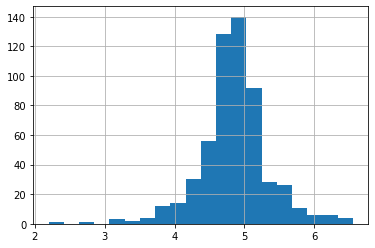

In [51]:
data['LoanAmount_log'].hist(bins=20)

In [53]:
print(data["LoanAmount"].var())

6681.643314583007


In [40]:
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'HouseholdIncome_log', 'LoanAmount_log', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [41]:
data[features].sample(10)

,Gender,Married,Dependents,Education,Self_Employed,HouseholdIncome_log,LoanAmount_log,Loan_Amount_Term,Credit_History,Property_Area
52,0,0,0,0,0,8.349957,4.718499,7.0,1.0,1
264,1,0,0,0,1,8.549854,4.852030,7.0,1.0,1
423,1,1,1,0,0,9.095715,4.700480,7.0,0.0,2
308,1,0,0,0,0,9.915070,6.173786,7.0,1.0,0
171,1,1,3,0,0,10.854431,6.551080,6.0,1.0,2
461,1,1,3,0,0,8.954157,4.852030,4.0,1.0,2
524,1,0,0,0,0,8.819813,4.986426,7.0,1.0,1
589,1,1,2,0,1,7.910591,4.663439,7.0,0.0,1
78,1,1,3,0,0,8.877242,5.192957,6.0,0.0,1
537,1,0,2,0,0,8.193400,4.672829,7.0,1.0,1


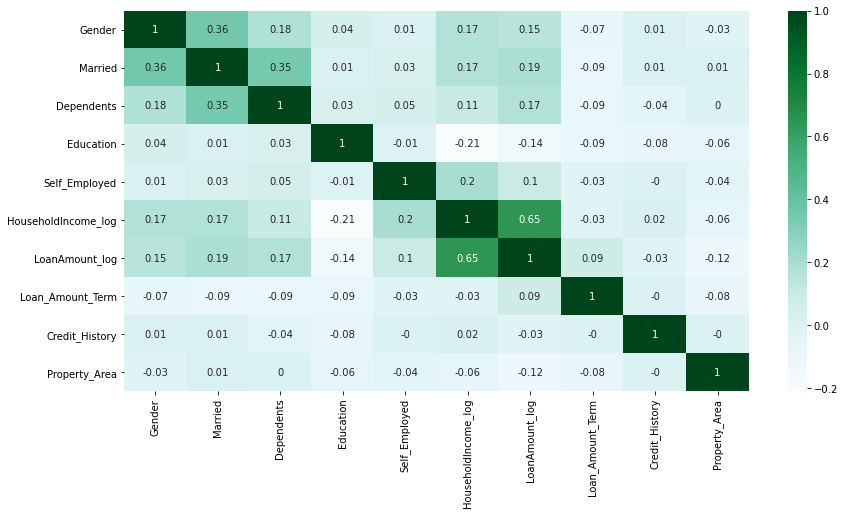

In [42]:
fig,ax=plt.subplots(figsize=(14, 7))
sns.heatmap(data=data[features].corr().round(2),annot=True,cmap="BuGn")
plt.show()

# ML

In [43]:
# split the data into test and train
X = data[features]
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=1)

In [44]:
#fit logreg to the train set
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [45]:
#predict instances from test set
y_pred = logreg.predict(X_test)

In [46]:
accuracy_score(y_pred, y_test)

0.7943262411347518

In [47]:
logreg.score(X_test, y_test)

0.7943262411347518

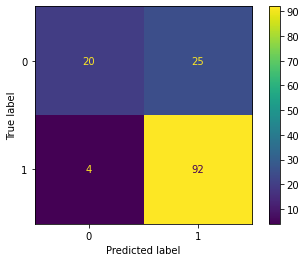

In [48]:
plot_confusion_matrix(logreg, X_test, y_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.44      0.58        45
           1       0.79      0.96      0.86        96

    accuracy                           0.79       141
   macro avg       0.81      0.70      0.72       141
weighted avg       0.80      0.79      0.77       141



In [50]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [51]:
roc_auc_score(y_test, y_pred_prob)

0.6986111111111111

In [52]:
cv_scores = cross_val_score(logreg, X, y, cv=10, scoring = 'accuracy')
print(cv_scores)

[0.80701754 0.84210526 0.78947368 0.75438596 0.80357143 0.78571429
 0.85714286 0.85714286 0.80357143 0.85714286]


In [53]:
cv_scores.mean()

0.8157268170426066

In [54]:
tol = [0.01, 0.001 ,0.0001]
C = [1.0,1.5,2.0,2.5]
max_iter=[100,150,200]
param_grid = dict( tol=tol, max_iter=max_iter, C=C)

In [55]:
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=10)
grid_result = grid_model.fit(X, y)

start_time = time.time()
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.815727 using {'C': 1.0, 'max_iter': 100, 'tol': 0.01}
Execution time: 0.0 ms


In [56]:
#randdom forest

In [57]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [58]:
accuracy_score(y_pred_rf, y_test)

0.7659574468085106

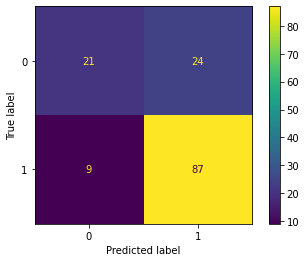

In [59]:
plot_confusion_matrix(rf, X_test, y_test)

In [60]:
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob_rf)

0.7171296296296297

In [82]:
rf.feature_importances_

array([0.02417192, 0.0309746 , 0.0519799 , 0.02618641, 0.02202772,
       0.24131387, 0.20051419, 0.04385351, 0.31146647, 0.04751141])

In [85]:
importances = [0.02417192, 0.0309746 , 0.0519799 , 0.02618641, 0.02202772,
       0.24131387, 0.20051419, 0.04385351, 0.31146647, 0.04751141]

In [83]:
features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'HouseholdIncome_log',
 'LoanAmount_log',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

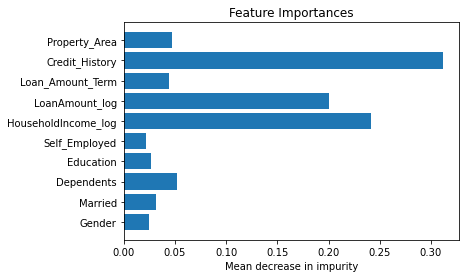

In [101]:
plt.barh(features, importances)
plt.xlabel('Mean decrease in impurity')
plt.title('Feature Importances')
plt.show()

In [62]:
#mlp classifier

In [63]:
mlp = MLPClassifier(random_state=1)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

In [64]:
accuracy_score(y_pred_mlp, y_test)

0.7943262411347518

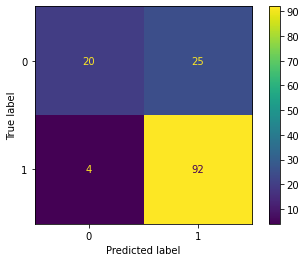

In [65]:
plot_confusion_matrix(mlp, X_test, y_test)

In [66]:
y_pred_prob_mlp = mlp.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob_mlp)

0.726851851851852

In [67]:
#naivebayes

In [68]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [69]:
accuracy_score(y_pred_gnb, y_test)

0.7801418439716312

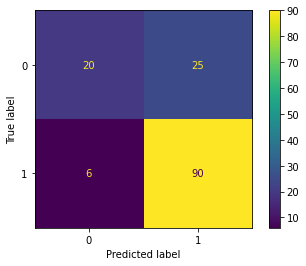

In [70]:
plot_confusion_matrix(gnb, X_test, y_test)

In [71]:
y_pred_prob_gnb = gnb.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob_gnb)

0.7439814814814815

In [72]:
#decisiontree

In [73]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [74]:
accuracy_score(y_pred_dt, y_test)

0.6737588652482269

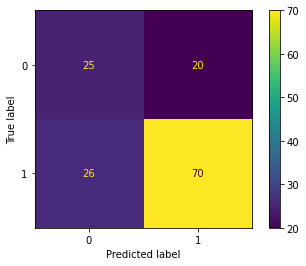

In [75]:
plot_confusion_matrix(dt, X_test, y_test)

In [76]:
y_pred_prob_dt = dt.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob_dt)

0.642361111111111

In [77]:
#support vector machine
svm = SVC(random_state = 1, probability = True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [78]:
accuracy_score(y_pred_svm, y_test)

0.7943262411347518

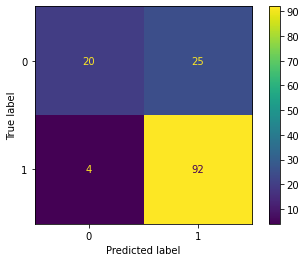

In [79]:
plot_confusion_matrix(svm, X_test, y_test)

In [80]:
#roc
y_pred_prob_svm = svm.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob_svm)

0.6983796296296296